In [13]:
import masuite
from masuite.agents.pytorch.policy_gradient import PGAgent
from masuite.algos.pytorch.simplepg import SimplePG
from masuite.algos.pytorch.stackpg import StackPG
from masuite.algos import experiment

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import random

In [15]:
def train_agents(AlgCls):
    env = masuite.load_from_id("soccer/0")
    env.seed()
    agents = [PGAgent(env.env_dim, env.n_acts, seed=0) for _ in range(2)]
    alg = AlgCls(agents, env.shared_state, env.n_players, 5000)
    logger = masuite.init_logging(
        filename=f"{AlgCls.__name__}-experiment",
        n_players=2,
        mode="csv",
        save_path="tmp/masuite",
        overwrite=True,
        log_freq=10,
        log_checkpoints=False,
        checkpoint_freq=10,
        params=None
    )
    experiment.run(alg, env, logger, 50, False)
    return agents

In [4]:
simplepg_agents = train_agents(SimplePG)
stackpg_agents = train_agents(StackPG)

Loaded masuite_id: soccer/0.
Seeding nn initialization: 0
Seeding nn initialization: 0
Logging to file: tmp/masuite/SimplePG-experiment.csv
epoch: 0 	 loss: [-0.05, 0.05] 	 return: [-0.09, 0.09]
epoch: 1 	 loss: [-0.05, 0.05] 	 return: [-0.07, 0.07]
epoch: 2 	 loss: [-0.09, 0.09] 	 return: [-0.13, 0.13]
epoch: 3 	 loss: [-0.13, 0.11] 	 return: [-0.15, 0.15]
epoch: 4 	 loss: [-0.08, 0.05] 	 return: [-0.08, 0.08]
epoch: 5 	 loss: [-0.04, 0.01] 	 return: [-0.06, 0.06]
epoch: 6 	 loss: [-0.01, -0.02] 	 return: [-0.05, 0.05]
epoch: 7 	 loss: [-0.0, -0.01] 	 return: [-0.07, 0.07]
epoch: 8 	 loss: [0.01, -0.01] 	 return: [-0.05, 0.05]
epoch: 9 	 loss: [0.0, -0.0] 	 return: [-0.06, 0.06]
epoch: 10 	 loss: [-0.01, 0.01] 	 return: [-0.04, 0.04]
epoch: 11 	 loss: [0.01, -0.01] 	 return: [0.0, -0.0]
epoch: 12 	 loss: [0.0, -0.0] 	 return: [-0.05, 0.05]
epoch: 13 	 loss: [0.01, -0.02] 	 return: [-0.01, 0.01]
epoch: 14 	 loss: [-0.01, 0.0] 	 return: [-0.02, 0.02]
epoch: 15 	 loss: [-0.02, 0.03] 	 re

In [5]:
from masuite.experiments.smallsoccer.analysis import simple_score
stackpg_path = "/home/zanedma/code/research/masuite/notebooks/tmp/masuite/StackPG-experiment.csv"
simplepg_path = "/home/zanedma/code/research/masuite/notebooks/tmp/masuite/SimplePG-experiment.csv"
scores = [simple_score(stackpg_path), simple_score(simplepg_path)]
print(scores)

[0.98, 0.46]


In [6]:
def plot_rets(title, df):
    plt.title(title)
    plt.plot(df["agent0_avg_rets"], label="player 1")
    plt.plot(df["agent1_avg_rets"], label="player 2")
    plt.legend()
    plt.show()

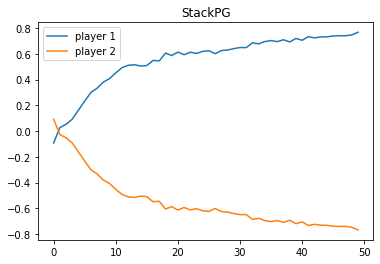

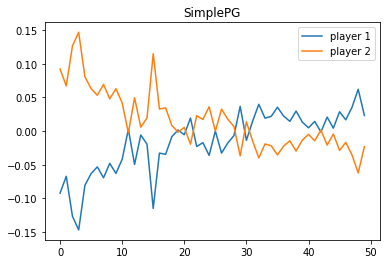

In [7]:
stack_df = pd.read_csv(stackpg_path)
plot_rets("StackPG", stack_df)
simple_df = pd.read_csv(simplepg_path)
plot_rets("SimplePG", simple_df)

In [8]:
def run_against_random_agent(agent, env_id):
    scores = []
    local_env = masuite.load_from_id(env_id)
    local_env.seed()
    for epoch in range(50):
        obs = local_env.reset()
        score = [0, 0]
        for _ in range(5000):
            acts = [agent.select_action(obs), random.choice(range(5))]
            # acts = [random.choice(range(5)), agent.select_action(obs)]
            obs, rews, done, _ = local_env.step(acts)
            if done:
                if rews[0] > 0:
                    score[0] += 1
                elif rews[1] > 0:
                    score[1] += 1
        print(f"epoch {epoch}: {score}")        
        scores.append(score[0]/(score[0]+score[1]))
        print(scores[-1])
    return scores

In [9]:
leader = stackpg_agents[0]
follower = stackpg_agents[1]
env_id = "soccer/0"
leader_scores = run_against_random_agent(leader, env_id)
follower_scores = run_against_random_agent(follower, env_id)
simple_scores0 = run_against_random_agent(simplepg_agents[0], env_id)
simple_scores1 = run_against_random_agent(simplepg_agents[1], env_id)

Loaded masuite_id: soccer/0.
epoch 0: [649, 429]
0.6020408163265306
epoch 1: [659, 469]
0.5842198581560284
epoch 2: [621, 419]
0.5971153846153846
epoch 3: [637, 380]
0.6263520157325467
epoch 4: [629, 411]
0.6048076923076923
epoch 5: [636, 441]
0.5905292479108635
epoch 6: [619, 424]
0.5934803451581975
epoch 7: [638, 446]
0.5885608856088561
epoch 8: [545, 462]
0.5412115193644489
epoch 9: [601, 392]
0.6052366565961732
epoch 10: [589, 497]
0.5423572744014733
epoch 11: [599, 450]
0.5710200190657769
epoch 12: [621, 419]
0.5971153846153846
epoch 13: [659, 428]
0.6062557497700092
epoch 14: [665, 398]
0.625587958607714
epoch 15: [689, 363]
0.6549429657794676
epoch 16: [619, 439]
0.5850661625708885
epoch 17: [690, 409]
0.6278434940855323
epoch 18: [697, 496]
0.584241408214585
epoch 19: [628, 385]
0.6199407699901284
epoch 20: [650, 388]
0.626204238921002
epoch 21: [668, 411]
0.6190917516218721
epoch 22: [626, 452]
0.5807050092764379
epoch 23: [660, 416]
0.6133828996282528
epoch 24: [671, 486]
0.5

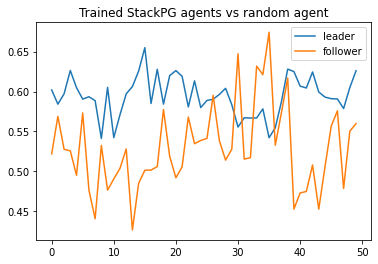

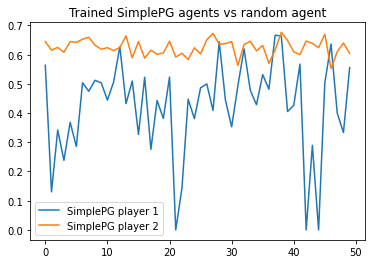

In [10]:
plt.plot(leader_scores, label="leader")
plt.plot(follower_scores, label="follower")
plt.legend()
plt.title("Trained StackPG agents vs random agent")
plt.show()

plt.plot(simple_scores0, label="SimplePG player 1")
plt.plot(simple_scores1, label="SimplePG player 2")
plt.legend()
plt.title("Trained SimplePG agents vs random agent")
plt.show()

In [16]:
def run_tournament(agents, masuite_id):
    scores = []
    local_env = masuite.load_from_id(masuite_id)
    local_env.seed()
    for epoch in range(50):
        obs = local_env.reset()
        score = [0, 0]
        for _ in range(5000):
            acts = [agent.select_action(obs) for agent in agents]
            obs, rews, done, _ = local_env.step(acts)
            if done:
                if rews[0] > 0:
                    score[0] += 1
                elif rews[1] > 0:
                    score[1] += 1
        print(f"epoch {epoch}: {score}")        
        scores.append(score[0]/(score[0]+score[1]))
        print(scores[-1])
    return scores

Loaded masuite_id: soccer/0.
epoch 0: [556, 333]
0.625421822272216
epoch 1: [563, 305]
0.6486175115207373
epoch 2: [510, 346]
0.5957943925233645
epoch 3: [503, 349]
0.5903755868544601
epoch 4: [517, 318]
0.6191616766467066
epoch 5: [499, 347]
0.5898345153664303
epoch 6: [509, 332]
0.6052318668252081
epoch 7: [544, 326]
0.6252873563218391
epoch 8: [479, 329]
0.5928217821782178
epoch 9: [514, 279]
0.648171500630517
epoch 10: [515, 306]
0.6272838002436053
epoch 11: [521, 347]
0.6002304147465438
epoch 12: [558, 335]
0.6248600223964166
epoch 13: [548, 373]
0.5950054288816504
epoch 14: [532, 337]
0.6121979286536249
epoch 15: [520, 372]
0.5829596412556054
epoch 16: [538, 370]
0.5925110132158591
epoch 17: [566, 325]
0.6352413019079686
epoch 18: [549, 337]
0.6196388261851016
epoch 19: [519, 352]
0.5958668197474167
epoch 20: [507, 297]
0.6305970149253731
epoch 21: [512, 310]
0.6228710462287105
epoch 22: [512, 327]
0.6102502979737783
epoch 23: [567, 327]
0.6342281879194631
epoch 24: [518, 356]
0.

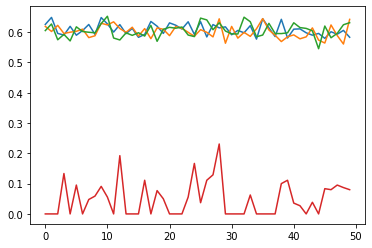

In [17]:
leader_leader = run_tournament([leader, leader], env_id)
follower_follower = run_tournament([follower, follower], env_id)
spg1_spg1 = run_tournament([simplepg_agents[0], simplepg_agents[0]], env_id)
spg2_spg2 = run_tournament([simplepg_agents[1], simplepg_agents[1]], env_id)

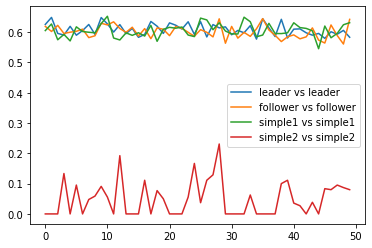

In [18]:

plt.plot(leader_leader, label="leader vs leader")
plt.plot(follower_follower, label="follower vs follower")
plt.plot(spg1_spg1, label="simple1 vs simple1")
plt.plot(spg2_spg2, label="simple2 vs simple2")
plt.legend()

In [ ]:
# leader vs random
# random vs follower
# simple1 vs random
# random vs simple2
# leader vs simple2
# simple1 vs follower


# leader vs simple2 challenger - leader is fixed follower learns from it
# leader challenger vs follower


# simple challenger vs random
# leader challenger vs random?